In [16]:
import pandas as pd
import missingno as msn

# Carga de datos

## Archivo products.csv

In [17]:
products = pd.read_csv("../data/products.csv")

print(f"Dimension: {products.shape}")
print(f"Cabecera {list(products.columns)}")

Dimension: (15238, 4)
Cabecera ['product_id', 'family_id', 'subfamily_id', 'price']


In [100]:
# Comprobamos si hay nulos en el dataset 
# msn.matrix(products)

In [101]:
# products.describe()

## Archivo stock_and_sales_day_0_day_63.csv

In [20]:
products_stock_ventas = pd.read_csv("../data/stock_and_sales_day_0_day_63.csv")

print(f"Dimension: {products_stock_ventas.shape}")
print(f"Cabecera {list(products_stock_ventas.columns)}")

Dimension: (2421061, 6)
Cabecera ['date_number', 'product_id', 'color_id', 'size_id', 'sales', 'stock']


In [102]:
# Comprobamos si hay nulos en el dataset 
# msn.matrix(products_stock_ventas)

In [103]:
# products_stock_ventas.head()

## Archivo product_blocks.csv

In [23]:
products_blocks = pd.read_csv("../data/product_blocks.csv")

print(f"Dimension: {products_blocks.shape}")
print(f"Cabecera {list(products_blocks.columns)}")

Dimension: (15238, 2)
Cabecera ['product_id', 'block_id']


In [104]:
# Comprobamos si hay nulos en el dataset 
# msn.matrix(products_blocks)

In [105]:
# products_blocks.head()

## Archivo positions_day_0_day_63.csv

In [26]:
product_positions_0_63 = pd.read_csv("../data/positions_day_0_day_63.csv")

print(f"Dimension: {product_positions_0_63.shape}")
print(f"Cabecera {list(product_positions_0_63.columns)}")

Dimension: (969897, 4)
Cabecera ['date_number', 'product_id', 'category_id', 'position']


In [106]:
# Comprobamos si hay nulos en el dataset 
# msn.matrix(product_positions_0_63)

In [107]:
# product_positions_0_63.head()

In [156]:
product_positions_0_63.groupby('product_id').count()

,date_number,category_id,position
product_id,,,
151926,20,20,20
213413,152,152,152
310130,96,96,96
455200,146,146,146
571044,110,110,110
658552,32,32,32
671985,78,78,78
759150,152,152,152
928389,20,20,20


# Dimensiones

In [31]:
products.shape

(15238, 4)

In [33]:
products_blocks.shape

(15238, 2)

In [34]:
products_stock_ventas.shape

(2421061, 6)

In [35]:
product_positions_0_63.shape

(969897, 4)

Multicategoria

In [154]:
product_positions_0_63.category_id.unique().shape

(408,)

In [125]:
mc = product_positions_0_63.drop('date_number',axis = 1).groupby(['product_id']).count()


In [152]:
product_positions_0_63.groupby(['product_id','date_number'])\
        .count()\
        .droplevel('date_number',axis=0)\
        .drop_duplicates().shape


(17, 2)

In [153]:
product_positions_0_63.groupby(['product_id','date_number'])\
        .count()\
        .drop_duplicates().shape

(17, 2)

# Problema para hacer join

In [160]:
product_positions_0_63.loc[(
    product_positions_0_63.product_id == 151926) & (product_positions_0_63.date_number == 59)]

,date_number,product_id,category_id,position
879996,59,151926,76153878,62
885071,59,151926,447647762,9
889023,59,151926,627301934,62
889667,59,151926,653552053,10


In [161]:
train.loc[(train.product_id==151926) & (train.date_number==59) ]

,product_id,family_id,subfamily_id,price,block_id,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,1969,59,909958217,111455099,0,17
1,151926,396066037,335531561,25.95,1969,59,909958217,242364222,3,63
2,151926,396066037,335531561,25.95,1969,59,909958217,513017386,1,33
3,151926,396066037,335531561,25.95,1969,59,909958217,820445075,1,42


In [165]:
aux1 = product_positions_0_63.loc[(
    product_positions_0_63.product_id == 151926) & (product_positions_0_63.date_number == 59)]

aux2 = train.loc[(train.product_id==151926) & (train.date_number==59) ]

pd.merge(aux1,aux2,on='product_id',how='inner')

,date_number_x,product_id,category_id,position,family_id,subfamily_id,price,block_id,date_number_y,color_id,size_id,sales,stock
0,59,151926,76153878,62,396066037,335531561,25.95,1969,59,909958217,111455099,0,17
1,59,151926,76153878,62,396066037,335531561,25.95,1969,59,909958217,242364222,3,63
2,59,151926,76153878,62,396066037,335531561,25.95,1969,59,909958217,513017386,1,33
3,59,151926,76153878,62,396066037,335531561,25.95,1969,59,909958217,820445075,1,42
4,59,151926,447647762,9,396066037,335531561,25.95,1969,59,909958217,111455099,0,17
5,59,151926,447647762,9,396066037,335531561,25.95,1969,59,909958217,242364222,3,63
6,59,151926,447647762,9,396066037,335531561,25.95,1969,59,909958217,513017386,1,33
7,59,151926,447647762,9,396066037,335531561,25.95,1969,59,909958217,820445075,1,42
8,59,151926,627301934,62,396066037,335531561,25.95,1969,59,909958217,111455099,0,17
9,59,151926,627301934,62,396066037,335531561,25.95,1969,59,909958217,242364222,3,63


# Mas cosas

In [147]:
product_positions_0_63.product_id.unique().shape

(8346,)

In [140]:
product_positions_0_63.groupby(['product_id','date_number']).count().droplevel('date_number',axis=0).drop_duplicates().shape

(17, 2)

In [126]:
mc

,category_id,position
product_id,,
151926,20,20
213413,152,152
310130,96,96
455200,146,146
571044,110,110
658552,32,32
671985,78,78
759150,152,152
928389,20,20


In [116]:
mc[mc.category_id >1].shape

(275784, 2)

In [117]:
mc[mc.category_id ==1].shape

(109672, 2)

In [54]:
product_positions_0_63.loc[(product_positions_0_63['product_id'] ==  151926) & (product_positions_0_63.date_number == 59)]

,date_number,product_id,category_id,position
879996,59,151926,76153878,62
885071,59,151926,447647762,9
889023,59,151926,627301934,62
889667,59,151926,653552053,10


In [60]:
products_stock_ventas.loc[
    (products_stock_ventas['product_id'] ==  151926) & 
    (products_stock_ventas.date_number == 59)]

,date_number,product_id,color_id,size_id,sales,stock
2191150,59,151926,909958217,111455099,0,17
2191151,59,151926,909958217,242364222,3,63
2191152,59,151926,909958217,513017386,1,33
2191153,59,151926,909958217,820445075,1,42


In [ ]:
products_stock_ventas.groupby(['product_id','date_number']).count()

In [ ]:
product_positions_0_63.groupby(['product_id','date_number']).count()

In [ ]:
product_positions_0_63.shape

In [47]:
product_positions_0_63.columns

Index(['date_number', 'product_id', 'category_id', 'position'], dtype='object')

# Dataframe Train

Join directo

In [42]:
train = pd.merge(products,products_blocks,how='inner',on='product_id')

In [43]:
train.shape

(15238, 5)

Join con ventas

In [44]:
train = pd.merge(train,products_stock_ventas,how='inner',on='product_id')

In [45]:
train.shape

(2421061, 10)

In [92]:
import matplotlib.pyplot as plt

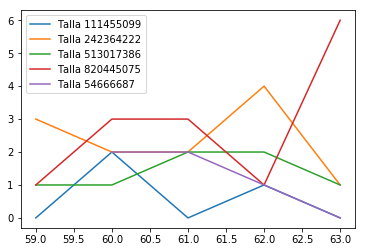

In [99]:
df = train[(train.product_id == 151926)]
for i in df.size_id.unique():
    x = train[(train.product_id == 151926) & (train.size_id == i)]
    plt.plot(x.date_number,x.sales, label=f'Talla {i}')
    #plt.plot(x.date_number,x.stock)
    
plt.legend()

In [77]:
train.head(1)

,product_id,family_id,subfamily_id,price,block_id,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,1969,59,909958217,111455099,0,17


In [78]:
product_positions_0_63.head(1)

,date_number,product_id,category_id,position
0,0,4450020,4461548,17


In [76]:
train['subfamily_id'].unique().shape

product_positions_0_63.category_id.unique().shape


(408,)

In [30]:
train.product_id.unique().size

8722

In [29]:
product_positions_0_63.product_id.unique().size

8346

In [17]:
train = pd.merge(train,product_positions_0_63,how='inner',on='product_id')

In [ ]:
train.head()